In [1]:
cd ../..

/home/jovyan/Robbi/dea-intertidal


In [2]:
import datacube

config = {
    'db_hostname': 'dea-dev-eks-proxy-share.endpoint.proxy-cxhoeczwhtar.ap-southeast-2.rds.amazonaws.com',
    'db_database': 'odc',
    'db_username': 'sandbox_reader',
    'db_password': 'ZWGRrBLmRs9WqTIj'
}
dc = datacube.Datacube(config=config)

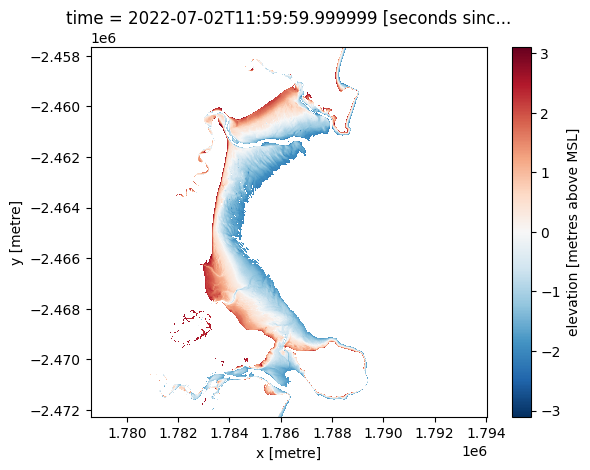

In [24]:
ds.elevation.plot.imshow()

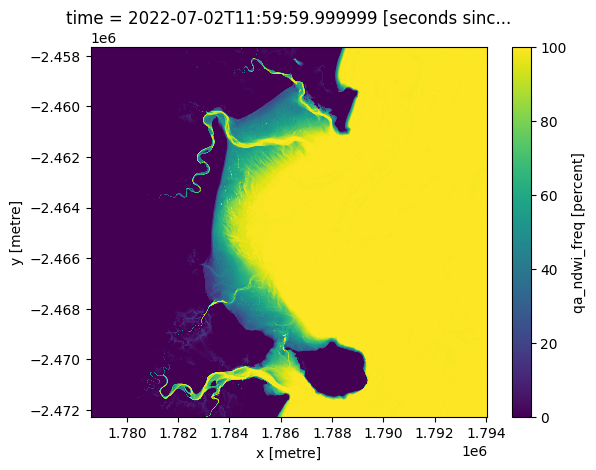

In [25]:
ds.qa_ndwi_freq.plot.imshow()

In [31]:
# elev.values[:] = 

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [37]:
import numpy as np
import xarray as xr


In [62]:
dem = xr.where(elev.isnull() & (freq < 50), elev_max, elev).fillna(elev_min)



In [66]:
dem.odc.assign_crs("EPSG:3577").odc.write_cog("deaintertidal_dem.tif")

PosixPath('deaintertidal_dem.tif')

In [68]:
ds_rgb.odc.to_rgba().odc.write_cog("deaintertidal_rgb.tif")

PosixPath('deaintertidal_rgb.tif')

## Dynamic

In [3]:
t, l = -23.47288, 151.13925
b, r = -23.54116, 151.24981

query_params = dict(x=(l, r), y=(t, b))

load_params = dict(
    dask_chunks={},
)

ds = dc.load(
    product="ga_s2ls_intertidal_cyear_3",
    measurements=["elevation"],
    **query_params,
    **load_params
).squeeze()

In [4]:
ds

<xarray.Dataset>
Dimensions:      (time: 7, y: 924, x: 1221)
Coordinates:
  * time         (time) datetime64[ns] 2016-07-01T23:59:59.999999 ... 2022-07...
  * y            (y) float64 -2.676e+06 -2.676e+06 ... -2.686e+06 -2.686e+06
  * x            (x) float64 1.927e+06 1.927e+06 ... 1.939e+06 1.939e+06
    spatial_ref  int32 3577
Data variables:
    elevation    (time, y, x) float32 dask.array<chunksize=(1, 924, 1221), meta=np.ndarray>
Attributes:
    crs:           epsg:3577
    grid_mapping:  spatial_ref